### Problem 1
#### (a)
Lagrangain form of the interpolation polynomial $P_2$ is: 
$$
P_2(x) 
= \sum\limits_{j \,= \,0}^n l_j(x)p(x_j) = \sum\limits_{j \,=\,0}^n \prod\limits_{k \,= \,0 \\ k \, \neq \,j}^n \frac{x-x_k}{x_j-x_k}f_j
= \frac{(x-1)(x-3)}{3} + \frac{x(x-3)}{-2} + \frac{x(x-1)}{6}(-5)
$$
#### (b)
$$
P_2(2) = \frac{(2-1)(2-3)}{3} + \frac{2(2-3)}{-2} + \frac{2(2-1)}{6}(-5) = \frac{-1}{3} + 1 + \frac{-10}{6} = -1
$$

### Problem 2

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as mat
from IPython.display import display, Math, Latex
########################################################
# Code By:        Daniel Arredondo
# Last edited:    11/06/2019
########################################################

# l_j is my function that calculates the Lagrange constant 
#         for the j-th node for a given x from a set of nodes
def l_j(nodes, j, x):
    mult = 1
    for k in range(len(nodes)):
        if (k != j):
            mult *= (x - nodes[k]) / (nodes[j] - nodes[k])
    return mult

# L_n is my function that takes each Legrange constant (l_j) and sums the absolute value of each,
#        taking as inputs the set of nodes and the given value x
def L_n(nodes, x):
    sum_lj = 0
    for i in range(len(nodes)):
        sum_lj += abs(l_j(nodes, i, x))  
    return sum_lj

# We first create our 1000 equidistance points in the form of an list
# and we create a second list of our given n-values
l = 1000
x = np.arange(-1,1+1/l,2/l)
arr = [4,10,20]

# Next, for each value n we create a list called "x_j" that contains n-amount of equidistanced nodes
# We take an empty list "Langrange_output" to hold the outputs of L_n(x_j,x_i), x_i being each value of our
# 1000 equidistanced points from before.
# We then graph each element from "Langrange_output", and then at the end take the max of the list
# as our supremum of L_n.
for n in arr:
    x_j = np.arange(-1, 1+1/n, 2/n)
    Langrange_output = []
    for x_i in x:
        Langrange_output.append(L_n(x_j,x_i))
    mat.plot(x, Langrange_output)
    mat.grid(True, which='both')
    mat.title('$L_n$ for n=%s'%(n))
    mat.show()
    print('Our max of the plot is: ')
    display( Math( r'$\Lambda_n$ = {}' .format( max(Langrange_output) ) ) )
    
for n in arr:
    x_j = []
    for j in range(n+1):
        x_j.append( m.cos( (j*m.pi)/n ))
    Langrange_output = []
    for x_i in x:
        Langrange_output.append(L_n(x_j,x_i))
    mat.plot(x, Langrange_output)
    mat.grid(True, which='both')
    mat.title('$L_n$ for n=%s'%(n))
    mat.show()
    print('Our max of the plot is: ')
    display( Math( r'$\Lambda_n$ = {}' .format( max(Langrange_output) ) ) )

<Figure size 640x480 with 1 Axes>

Our max of the plot is: 


<IPython.core.display.Math object>

<Figure size 640x480 with 1 Axes>

Our max of the plot is: 


<IPython.core.display.Math object>

<Figure size 640x480 with 1 Axes>

Our max of the plot is: 


<IPython.core.display.Math object>

<Figure size 640x480 with 1 Axes>

Our max of the plot is: 


<IPython.core.display.Math object>

<Figure size 640x480 with 1 Axes>

Our max of the plot is: 


<IPython.core.display.Math object>

<Figure size 640x480 with 1 Axes>

Our max of the plot is: 


<IPython.core.display.Math object>

### Problem 3

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as mat
from IPython.display import display, Math, Latex
from scipy.special import comb # N choose k

def lambda_val_output(nodes, j):
    mult = 1
    for k in range(len(nodes)):
        if (k != j):
            mult *= (nodes[j] - nodes[k])
    return (mult**(-1))


def Barycentric_approx(nodes, f_j, x):
    sum_1_f = 0
    sum_2 = 0
    for k in range(len(nodes)):
        if abs(x-nodes[k]) > 0.00001:
            sum_1_f += f_j[k]*lambda_val_output(nodes,k)*(x-nodes[k])**(-1)
            sum_2 += lambda_val_output(nodes,k)*(x-nodes[k])**(-1)
        else:
            return (f_j[k])
    return (sum_1_f / sum_2)

xj_nodes = [0.0, 0.25, 0.52, 0.74, 1.28, 1.50]
fj_values = [0.0, 0.7070, 1.0, 0.7071, -0.7074, -1.0]

print('My approximation to f(2) using Barycentric approximation at x=2 is', Barycentric_approx(xj_nodes, fj_values, 2))

My approximation to f(2) using Barycentric approximation at x=2 is -2.343829608172842


### Problem 4

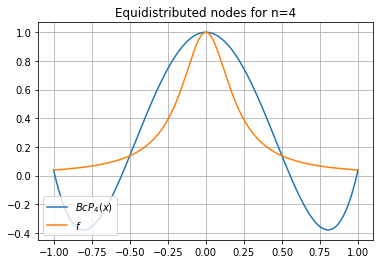

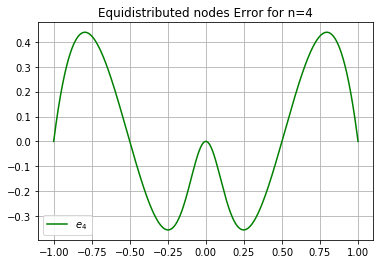

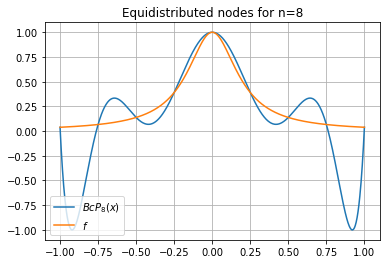

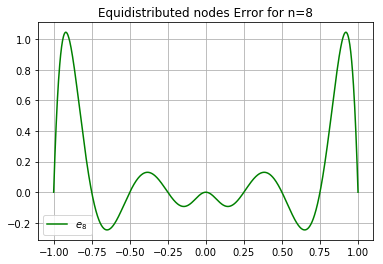

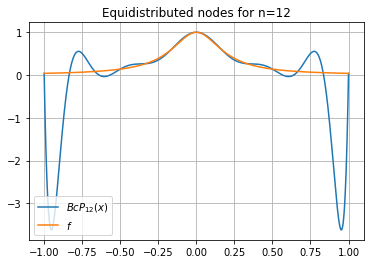

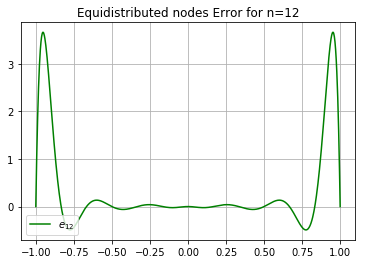

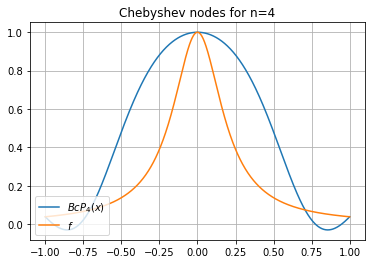

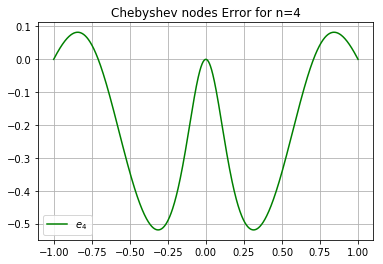

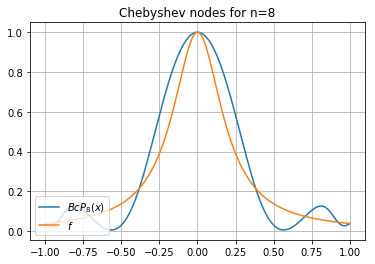

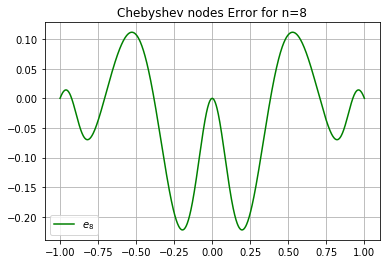

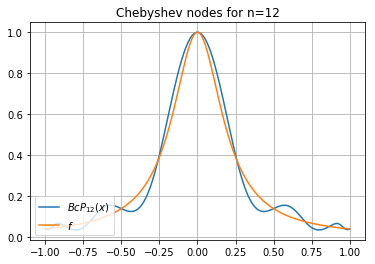

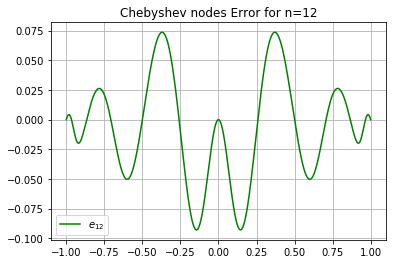

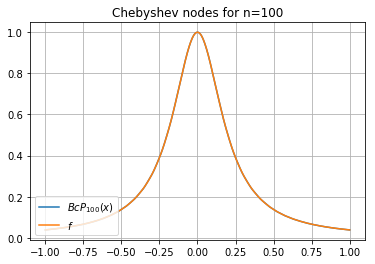

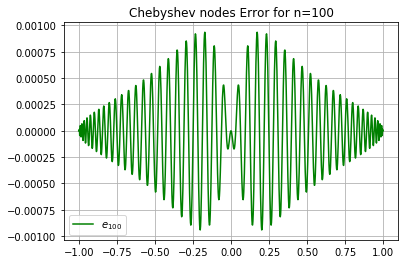

In [3]:
import numpy as np
import math as m
import matplotlib.pyplot as mat
from IPython.display import display, Math, Latex
from scipy.special import comb

def func(x):
    temp = 1 + 25*x**2
    return temp**(-1)

l = 1000
x = np.arange(-1,1+1/l,2/l)
arr = [4,8,12,100]

def lambda_val_output(nodes, j):
    n = len(nodes) - 1
    return ( ((-1)**j) * (comb(n,j, exact=True)) )

for n in arr[0:3]:
    nodes_1 = np.arange(-1, 1+1/n, 2/n)
    f_x1 = []
    for nub in nodes_1:
        f_x1.append(func(nub))
    temp_1 = []
    for x_i in x:
        temp_1.append(Barycentric_approx(nodes_1, f_x1, x_i))
    mat.plot(x, temp_1, label='$BcP_{%s}(x)$'%(n))
    mat.plot(x, func(x), label='$f$')
    #mat.plot(x, func(x)-temp_1, label='$e_{%s}$'%(n), color='g')
    mat.legend(loc='lower left')
    mat.grid(True, which='both')
    mat.title('Equidistributed nodes for n=%s'%(n))
    mat.show()
    
    mat.plot(x, func(x)-temp_1, label='$e_{%s}$'%(n), color='g')
    mat.legend(loc='lower left')
    mat.grid(True, which='both')
    mat.title('Equidistributed nodes Error for n=%s'%(n))
    mat.show()

def lambda_val_output(nodes, j):
    n = len(nodes)
    l_j = (-1)**j
    return( l_j )

for n in arr:
    nodes_2 = []
    f_x2 = []
    for j in range(n+1):
        nodes_2.append( m.cos( (j*m.pi)/n ))
    for nib in nodes_2:
        f_x2.append(func(nib));    
    temp_2 = []
    for x_i in x:
        temp_2.append(Barycentric_approx(nodes_2, f_x2, x_i))
    mat.plot(x, temp_2, label='$BcP_{%s}(x)$'%(n))
    mat.plot(x, func(x), label='$f$')
    #mat.plot(x, func(x)-temp_2, label='$e_{%s}$'%(n), color='g')
    mat.legend(loc='lower left')
    mat.grid(True, which='both')
    mat.title('Chebyshev nodes for n=%s'%(n))
    mat.show()
    
    mat.plot(x, func(x)-temp_2, label='$e_{%s}$'%(n), color='g')
    mat.legend(loc='lower left')
    mat.grid(True, which='both')
    mat.title('Chebyshev nodes Error for n=%s'%(n))
    mat.show()

Above are the plots for 4.a, 4.b, and 4.c. The green line represents the error between the approximations and the given function. We see that by using Chebyshev nodes, we get a very accurate approximation at n=100, and at n=12 our approximation is getting close. Using equidistributed nodes, our error is erratic at the endpoints, but approximates the function well in the center. This can be explained by the fact that the Lebesgue constant is not bounded in n, so as n goes to $\infty$, we cannot conclude that $\|f - p_n\|_\infty$ converges uniformly.

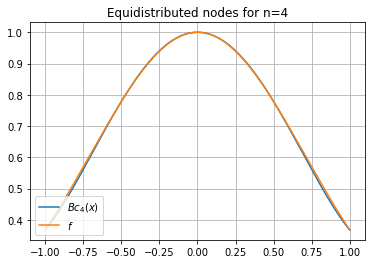

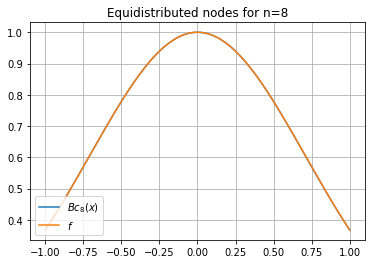

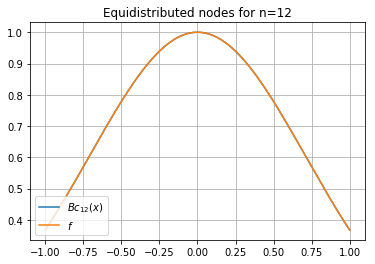

In [4]:
import numpy as np
import math as m
import matplotlib.pyplot as mat
from IPython.display import display, Math, Latex

func_2 = lambda x: m.e**(-x**2)

l = 1000
x = np.arange(-1,1+1/l,2/l)
arr_2 = [4,8,12]

def lambda_val_output(nodes, j):
    n = len(nodes) - 1
    return ( ((-1)**j) * (comb(n,j, exact=True)) )

for n in arr_2:
    nodes_3 = np.arange(-1, 1+1/n, 2/n)
    f_x3 = []
    for dab in nodes_3:
        f_x3.append(func_2(dab))
    temp_3 = []
    for x_i in x:
        temp_3.append(Barycentric_approx(nodes_3, f_x3, x_i))
    mat.plot(x, temp_3, label='$Bc_{%s}(x)$'%(n))
    mat.plot(x, func_2(x), label='$f$')
    mat.legend(loc='lower left')
    mat.grid(True, which='both')
    mat.title('Equidistributed nodes for n=%s'%(n))
    mat.show()

Using equidistant nodes, we have a very close approximation to the function. It may be that since the function is very close to being a quadratic polynomial, using equidistanced nodes the Barycentric formula for polynomials approximates quadratics very well.